# Assignment 4.2

# a. Data Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mat_file = loadmat('reg1d.mat')
X_test = loadmat('reg1d.mat')['X_test']
Y_test = loadmat('reg1d.mat')['Y_test']
X_train = loadmat('reg1d.mat')['X_train']
Y_train = loadmat('reg1d.mat')['Y_train']

new_X_train=np.insert(X_train, 0, 1, axis=1) # concatenate 1 for the bias term
print("new_X_train=",new_X_train)

new_X_train= [[ 1.    0.94]
 [ 1.    0.8 ]
 [ 1.    0.78]
 [ 1.    0.06]
 [ 1.    0.88]
 [ 1.    0.32]
 [ 1.    0.34]
 [ 1.    0.98]
 [ 1.    0.04]
 [ 1.    0.5 ]
 [ 1.    0.16]
 [ 1.    0.44]
 [ 1.    0.52]
 [ 1.    0.4 ]
 [ 1.    0.2 ]
 [ 1.    0.36]
 [ 1.    0.68]
 [ 1.    0.96]
 [ 1.    0.12]
 [ 1.    0.48]
 [ 1.    0.58]
 [ 1.    0.74]
 [ 1.    0.92]
 [ 1.    0.56]
 [ 1.    0.08]
 [ 1.    0.22]
 [ 1.    0.82]
 [ 1.    0.3 ]
 [ 1.    0.64]
 [ 1.    0.76]
 [ 1.    0.9 ]
 [ 1.    0.62]
 [ 1.    0.14]
 [ 1.    0.54]
 [ 1.    0.02]
 [ 1.    0.  ]]


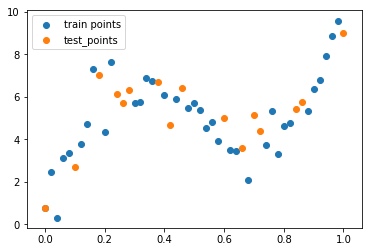

In [2]:
plt1=plt.scatter(X_train, Y_train)
plt2=plt.scatter(X_test, Y_test)
plt.legend([plt1,plt2],['train points', 'test_points'])
plt.show()

# b. Learning

Optimal theta = [[ 3.68232888  2.70476581]]


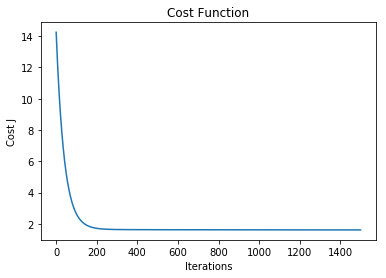

In [3]:
def least_squares(X, Y, theta):
    m = Y.size # m is the total number of examples
    h = X.dot(np.transpose(theta)) # The linear function looks like h_theta(x) = theta0+theta1*x
    J = 1/(2*m)*np.sum(np.square(np.subtract(h, Y)))
    return J


def gradient_descent(X,Y, alpha=0.01, num_iters=1500):
    theta = np.zeros((1, X.shape[1]))
    m = Y.size # m is the total number of examples
    J_history = np.zeros(num_iters)

    for iter in np.arange(num_iters):
        h = X.dot(np.transpose(theta))
        theta_T = np.transpose(theta) - alpha*(1/m) * np.transpose(X).dot(np.subtract(h, Y))
        theta = np.transpose(theta_T)
        # print(theta)
        J_history[iter] = least_squares(X, Y, theta)

    return(theta, J_history)

theta, Cost_J = gradient_descent(new_X_train,Y_train)

print("Optimal theta =", theta)


plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.title('Cost Function')
plt.show()


xx = np.linspace(0,1,20)
yy = theta[0][0]+theta[0][1]*xx

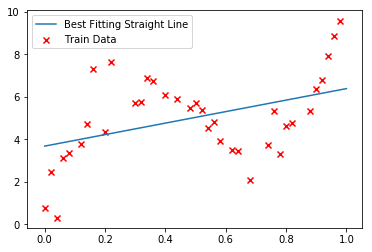

In [4]:
xx = np.linspace(0,1,20)
yy = theta[0][0]+theta[0][1]*xx

# Plot Straight Line
plt.scatter(X_train, Y_train, c='r', marker='x', linewidths=1, label="Train Data")
plt.plot(xx,yy, label='Best Fitting Straight Line')
plt.legend()
plt.show()

# c. Evaluation

In [5]:
def lossL2(Y, Y_pred):
    m = Y_pred.size
    return (1/m)*np.sum(np.square(np.subtract(Y_pred, Y))) # This is the mean squared error (note the lack of 1/(2*m))


Y_pred = np.array([theta[0][0] + theta[0][1] * xx for xx in X_train])
err = lossL2(Y_train, Y_pred)
print(err)

3.23022862174


# d. Non-linear features

Poly X train= [[  1.00000000e+00   9.40000000e-01   8.83600000e-01   8.30584000e-01]
 [  1.00000000e+00   8.00000000e-01   6.40000000e-01   5.12000000e-01]
 [  1.00000000e+00   7.80000000e-01   6.08400000e-01   4.74552000e-01]
 [  1.00000000e+00   6.00000000e-02   3.60000000e-03   2.16000000e-04]
 [  1.00000000e+00   8.80000000e-01   7.74400000e-01   6.81472000e-01]
 [  1.00000000e+00   3.20000000e-01   1.02400000e-01   3.27680000e-02]
 [  1.00000000e+00   3.40000000e-01   1.15600000e-01   3.93040000e-02]
 [  1.00000000e+00   9.80000000e-01   9.60400000e-01   9.41192000e-01]
 [  1.00000000e+00   4.00000000e-02   1.60000000e-03   6.40000000e-05]
 [  1.00000000e+00   5.00000000e-01   2.50000000e-01   1.25000000e-01]
 [  1.00000000e+00   1.60000000e-01   2.56000000e-02   4.09600000e-03]
 [  1.00000000e+00   4.40000000e-01   1.93600000e-01   8.51840000e-02]
 [  1.00000000e+00   5.20000000e-01   2.70400000e-01   1.40608000e-01]
 [  1.00000000e+00   4.00000000e-01   1.60000000e-01   6.400000

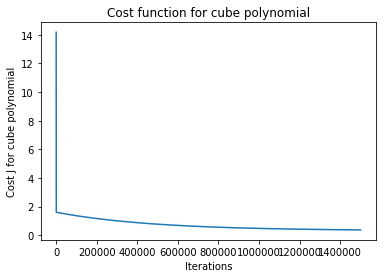

In [6]:

square_X_train=np.insert(new_X_train, 2, np.square(X_train.T), axis=1)
cube_X_train=np.insert(square_X_train, 3, np.power(X_train.T, 3), axis=1)
print("Poly X train=", cube_X_train)

theta_cubefeature, Cost_J_cubefeature = gradient_descent(cube_X_train, Y_train, num_iters=1500000)
print(theta_cubefeature)

xx = np.linspace(0,1,20)
yy = theta_cubefeature[0][0]+theta_cubefeature[0][1]*xx + theta_cubefeature[0][2]*xx*xx+theta_cubefeature[0][3]*xx*xx*xx

plt.plot(Cost_J_cubefeature)
plt.ylabel('Cost J for cube polynomial')
plt.xlabel('Iterations')
plt.title('Cost function for cube polynomial')
plt.show()

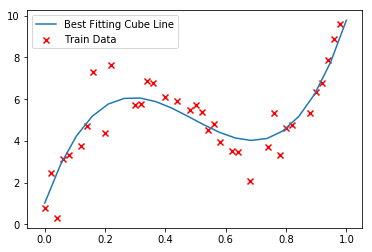

In [7]:

# Plot Cupe Line
plt.scatter(X_train, Y_train, c='r', marker='x', linewidths=1, label="Train Data")
plt.plot(xx,yy, label='Best Fitting Cube Line')
plt.legend()
plt.show()


# e. Outlier

new_X_train= [[ 1.    1.05]
 [ 1.    0.94]
 [ 1.    0.8 ]
 [ 1.    0.78]
 [ 1.    0.06]
 [ 1.    0.88]
 [ 1.    0.32]
 [ 1.    0.34]
 [ 1.    0.98]
 [ 1.    0.04]
 [ 1.    0.5 ]
 [ 1.    0.16]
 [ 1.    0.44]
 [ 1.    0.52]
 [ 1.    0.4 ]
 [ 1.    0.2 ]
 [ 1.    0.36]
 [ 1.    0.68]
 [ 1.    0.96]
 [ 1.    0.12]
 [ 1.    0.48]
 [ 1.    0.58]
 [ 1.    0.74]
 [ 1.    0.92]
 [ 1.    0.56]
 [ 1.    0.08]
 [ 1.    0.22]
 [ 1.    0.82]
 [ 1.    0.3 ]
 [ 1.    0.64]
 [ 1.    0.76]
 [ 1.    0.9 ]
 [ 1.    0.62]
 [ 1.    0.14]
 [ 1.    0.54]
 [ 1.    0.02]
 [ 1.    0.  ]]


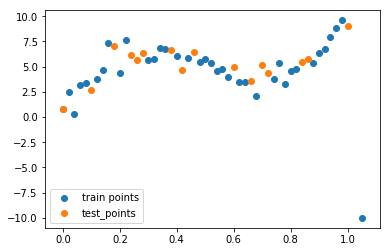

Optimal theta = [[ 4.0886999   0.97133214]]


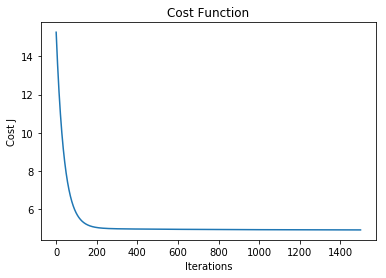

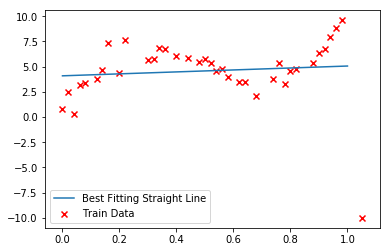

9.86121626603
Poly X train= [[  1.00000000e+00   1.05000000e+00   1.10250000e+00   1.15762500e+00]
 [  1.00000000e+00   9.40000000e-01   8.83600000e-01   8.30584000e-01]
 [  1.00000000e+00   8.00000000e-01   6.40000000e-01   5.12000000e-01]
 [  1.00000000e+00   7.80000000e-01   6.08400000e-01   4.74552000e-01]
 [  1.00000000e+00   6.00000000e-02   3.60000000e-03   2.16000000e-04]
 [  1.00000000e+00   8.80000000e-01   7.74400000e-01   6.81472000e-01]
 [  1.00000000e+00   3.20000000e-01   1.02400000e-01   3.27680000e-02]
 [  1.00000000e+00   3.40000000e-01   1.15600000e-01   3.93040000e-02]
 [  1.00000000e+00   9.80000000e-01   9.60400000e-01   9.41192000e-01]
 [  1.00000000e+00   4.00000000e-02   1.60000000e-03   6.40000000e-05]
 [  1.00000000e+00   5.00000000e-01   2.50000000e-01   1.25000000e-01]
 [  1.00000000e+00   1.60000000e-01   2.56000000e-02   4.09600000e-03]
 [  1.00000000e+00   4.40000000e-01   1.93600000e-01   8.51840000e-02]
 [  1.00000000e+00   5.20000000e-01   2.70400000e

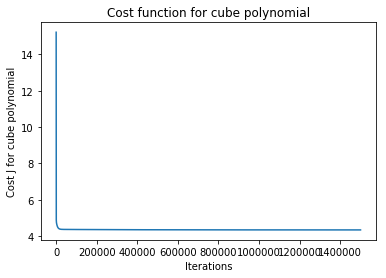

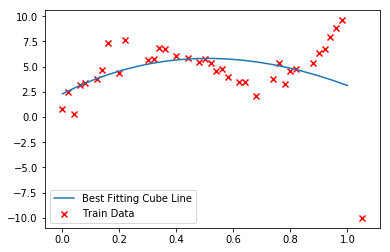

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mat_file = loadmat('reg1d.mat')
X_test = loadmat('reg1d.mat')['X_test']
Y_test = loadmat('reg1d.mat')['Y_test']
X_train = loadmat('reg1d.mat')['X_train']
Y_train = loadmat('reg1d.mat')['Y_train']

### Part e ###
X_train = np.insert(X_train, 0, 1.05, axis=0)
Y_train = np.insert(Y_train, 0, -10, axis=0)
####################################################

new_X_train=np.insert(X_train, 0, 1, axis=1) # concatenate 1 for the bias term
print("new_X_train=",new_X_train)

plt1=plt.scatter(X_train, Y_train)
plt2=plt.scatter(X_test, Y_test)
plt.legend([plt1,plt2],['train points', 'test_points'])
plt.show()

def least_squares(X, Y, theta):
    m = Y.size # m is the total number of examples
    h = X.dot(np.transpose(theta)) # The linear function looks like h_theta(x) = theta0+theta1*x
    J = 1/(2*m)*np.sum(np.square(np.subtract(h, Y)))
    return J

def gradient_descent(X,Y, alpha=0.01, num_iters=1500):
    theta = np.zeros((1, X.shape[1]))
    m = Y.size # m is the total number of examples
    J_history = np.zeros(num_iters)

    for iter in np.arange(num_iters):
        h = X.dot(np.transpose(theta))
        theta_T = np.transpose(theta) - alpha*(1/m) * np.transpose(X).dot(np.subtract(h, Y))
        theta = np.transpose(theta_T)
        # print(theta)
        J_history[iter] = least_squares(X, Y, theta)

    return(theta, J_history)

theta, Cost_J = gradient_descent(new_X_train,Y_train)

print("Optimal theta =", theta)

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.title('Cost Function')
plt.show()

xx = np.linspace(0,1,20)
yy = theta[0][0]+theta[0][1]*xx

# Plot Straight Line
plt.scatter(X_train, Y_train, c='r', marker='x', linewidths=1, label="Train Data")
plt.plot(xx,yy, label='Best Fitting Straight Line')
plt.legend()
plt.show()

def lossL2(Y, Y_pred):
    m = Y_pred.size
    return (1/m)*np.sum(np.square(np.subtract(Y_pred, Y))) # This is the mean squared error (note the lack of 1/(2*m))

Y_pred = np.array([theta[0][0] + theta[0][1] * xx for xx in X_train])
err = lossL2(Y_train, Y_pred)
print(err)

square_X_train=np.insert(new_X_train, 2, np.square(X_train.T), axis=1)
cube_X_train=np.insert(square_X_train, 3, np.power(X_train.T, 3), axis=1)
print("Poly X train=", cube_X_train)

theta_cubefeature, Cost_J_cubefeature = gradient_descent(cube_X_train, Y_train, num_iters=1500000)
print(theta_cubefeature)

xx = np.linspace(0,1,20)
yy = theta_cubefeature[0][0]+theta_cubefeature[0][1]*xx + theta_cubefeature[0][2]*xx*xx+theta_cubefeature[0][3]*xx*xx*xx

plt.plot(Cost_J_cubefeature)
plt.ylabel('Cost J for cube polynomial')
plt.xlabel('Iterations')
plt.title('Cost function for cube polynomial')
plt.show()

# Plot Cupe Line
plt.scatter(X_train, Y_train, c='r', marker='x', linewidths=1, label="Train Data")
plt.plot(xx,yy, label='Best Fitting Cube Line')
plt.legend()
plt.show()